In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

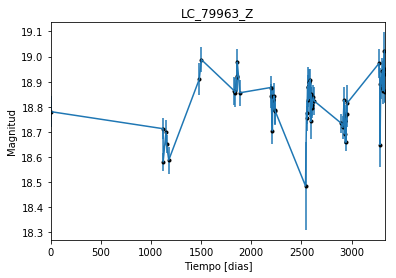

In [2]:
data = np.genfromtxt('LC_79963_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79963_Z')
plt.savefig("LC_79963_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

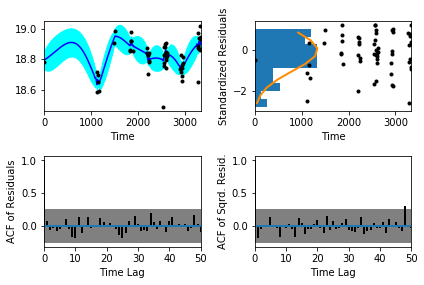

In [5]:
sample.assess_fit()

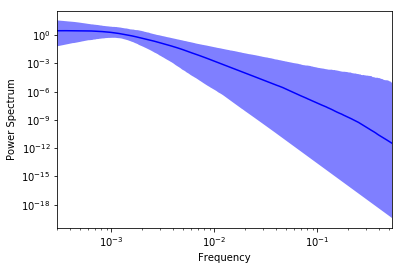

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

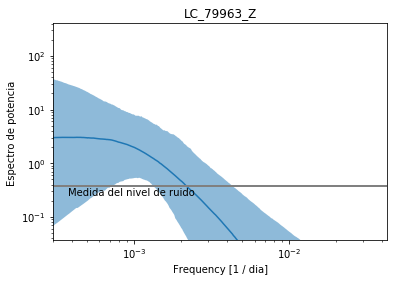

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79963_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79963_Z')

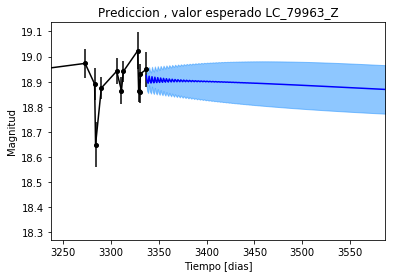

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79963_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79963_Z')

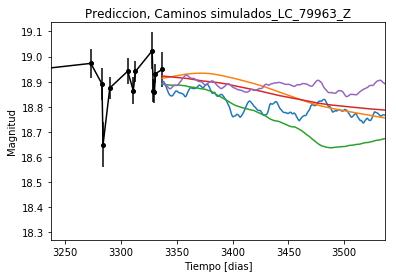

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79963_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


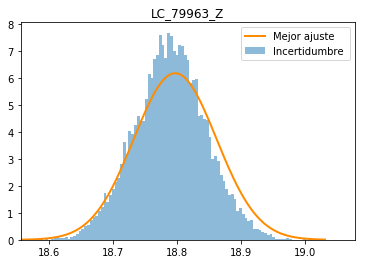

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79963_Z')
plt.savefig("Mejor_ajuste_LC_79963_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79963_Z')

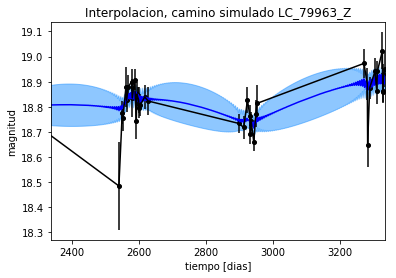

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_79963_Z')

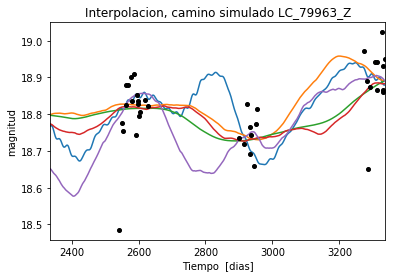

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 379.376361375
Median: 0.00358535081946
Standard deviation: 0.173656752351
68% credibility interval: [ 0.0004826   0.10491248]
95% credibility interval: [  3.18092579e-04   6.84876494e-01]
99% credibility interval: [  3.03851396e-04   9.70645003e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 475.164671416
Median: 0.00119543262452
Standard deviation: 0.0774359797386
68% credibility interval: [ 0.0004187   0.01491088]
95% credibility interval: [ 0.00031436  0.19978639]
99% credibility interval: [  3.03431433e-04   5.86484324e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 883.042512635
Median: 0.0197870014917
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 953.12529839
Median: 100.659644711
Standard deviation: 1.69861142558
68% credibility interval: [  98.83705653  102.00209629]
95% credibility interval: [  96.40802212  103.10018028]
99% credibility interval: [  94.45394702  103.59695581]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 433.863131752
Median: 0.524764690268
Standard deviation: 2.04510261243
68% credibility interval: [ 0.04729196  3.45889308]
95% credibility interval: [ 0.01249684  6.81618574]
99% credibility interval: [  8.97336018e-03   9.06357471e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 904.976810569
Median: 0.159126003051
Standard deviation: 8.73735296591
68% credibility interval: [ 0.00580525  5.7355227 ]
95% credibility interval: [  2.7

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1024.43998058
Median: 1.20368209997e-14
Standard deviation: 1.32250621884e+99
68% credibility interval: [  2.99008812e-43   5.54896790e+28]
95% credibility interval: [  9.65787714e-75   1.10682847e+84]
99% credibility interval: [  1.45560670e-110   3.34214887e+098]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1977.52658625
Median: 18.8168714271
Standard deviation: 0.0523609741654
68% credibility interval: [ 18.77531229  18.8521342 ]
95% credibility interval: [ 18.69951136  18.91109663]
99% credibility interval: [ 18.62680991  18.97582806]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 253.694799416
Median: 0.00143590853359
Standard deviation: 0.235055154
68% credibility interval: [ 0.          0.30975519]
95% credibility interval: [ 0.          0.87425563]
99% credibility interval: [ 0.          1.02801134]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 253.694799416
Median: 0.00143590853359
Standard deviation: 0.235055154
68% credibility interval: [ 0.          0.30975519]
95% credibility interval: [ 0.          0.87425563]
99% credibility interval: [ 0.          1.02801134]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 435.403604154
Median: 0.0
Standard deviation: 0.000550108110042
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 953.12529839
Median: 100.659644711
Standard deviation: 1.69861142558
68% credibility interval: [  98.83705653  102.00209629]
95% credibility interval: [  96.40802212  103.10018028]
99% credibility interval: [  94.45394702  103.59695581]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1439.94915046
Median: 0.0106660658785
Standard deviation: 0.0169281317371
68% credibility interval: [ 0.0060263   0.02129533]
95% credibility interval: [ 0.00368572  0.05941281]
99% credibility interval: [ 0.00280146  0.11270666]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1550.94445575
Median: 1.13924246185
Standard deviation: 0.177036088562
68% credibility interval: [ 0.99069582  1.32832411]
95% credibility interval: [ 0.85285954  1.55746224]
99% credibility interval: [ 0.7859307   1.70226584]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 670.28624765
Median: 6.05864492728e-06
Standard deviation: 0.0939165313052
68% credibility interval: [  1.63037039e-32   1.38237895e-03]
95% credibility interval: [  9.18072953e-88   6.19591426e-02]
99% credibility interval: [  1.14013939e-100   4.70353360e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 379.376361375
Median: (-0.0225274235899+0j)
Standard deviation: 1.83623436014
68% credibility interval: [-0.65918454-3.51942822j -0.00303224-0.00558563j]
95% credibility interval: [ -4.30320593e+00-1.10253244j  -1.99863462e-03-0.0070666j ]
99% credibility interval: [ -6.09874242e+00+0.j        -1.90915462e-03-0.004299j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 475.164671416
Median: (-0.0075111247021+0j)
Standard deviation: 1.55497420058
68% credibility interval: [-0.09368782+1.78815525j -0.00263075+2.75569714j]
95% credibility interval: [-1.25529488 +5.65103506e+00j -0.00197517 +4.59276486e-03j]
99% credibility interval: [ -3.68498968e+00+1.14300669j  -1.90651592e-03+0.01070503j]
Posterior summary for parameter 